# Analise Financeira com Python

Descrição: É um projeto que faz a analise de ações, através da linguagem de programação python, o qual utilizamos os pacotes básicos de analise e matemática (pandas, numpy, math), pacotes para construção de gráficos (matplotlib, plotyly) e um pacote para coletar os preços e o histórico das ações em tempo real chamado pandas_datareader, que extrai dados de várias fontes da Internet em um DataFrame do pandas, nesse prójeto utilizamos a fonte de dados do yahoo.

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

from plotly.offline import plot, iplot
import plotly
import plotly.offline as py

import plotly.express as px
import plotly.graph_objects as go

from datetime import date
from datetime import datetime as dt
import datetime

In [2]:
# Lista de códigos de ações aleatórias para analise
lista = ['HCTR11.sa','BBFI11B.sa','COGN3.sa','SPTW11.sa','OIBR3.sa','VVAR3.sa']

In [3]:
# criação de um DataFrame com os preços de fechamento ao longo do tempo da ações da lista   
dado = web.DataReader(lista, data_source = 'yahoo')['Adj Close']
ibov = web.DataReader('^BVSP','yahoo')['Adj Close']

In [4]:
# Verificamos o começo e o fim do dataset
dado.head(-5)

Symbols      HCTR11.sa   BBFI11B.sa   COGN3.sa  SPTW11.sa  OIBR3.sa   VVAR3.sa
Date                                                                          
2016-05-18         NaN  2341.788574  10.436380  68.508705  0.604496   2.983114
2016-05-19         NaN  2361.368164  10.693388  68.015831  0.597033   2.784240
2016-05-20         NaN  2361.368164  10.436380  66.103500  0.604496   2.784240
2016-05-23         NaN  2361.368164  10.060047  68.410133  0.604496   2.784240
2016-05-24         NaN  2302.333984  10.390488  66.754089  0.604496   2.784240
...                ...          ...        ...        ...       ...        ...
2021-05-04  149.759995  2493.000000   3.770000  59.910000  1.700000  11.940000
2021-05-05  143.300003  2479.399902   3.880000  59.700001  1.720000  12.100000
2021-05-06  142.850006  2471.060059   3.850000  56.549999  1.710000  11.960000
2021-05-07  142.339996  2496.000000   3.870000  55.259998  1.770000  12.160000
2021-05-10  137.910004  2525.989990   3.970000  54.689999  1.750000  12.030000

[1235 rows x 6 columns]

In [5]:
# Vamos deletar as linhas que tem Nan para deixar a quantidade de resgistros igual para todas as ações
dado.dropna(axis=0, inplace=True)

In [6]:
# Vamos normalizar os dados supondo que foi comprado R$10.000,00 de cada ação
dado_normalizado = (dado/dado.iloc[0])*10000
dado_normalizado.head(-5).style.format('R${:,.2f}')

In [7]:
# Vamos criar uma coluna com o saldo de cada dia
dado_normalizado['saldo_carteira'] = dado_normalizado.sum(axis=1)
dado_normalizado.style.format('R${:,.2f}')

In [37]:
# Reindexando o ibov com o index da carteira
ibov_reindexado = ibov.reindex_like(dado_normalizado)

In [38]:
# Normalização dos dados do ibovespa
ibov_normalizado = (ibov_reindexado/ibov_reindexado[0])*60000

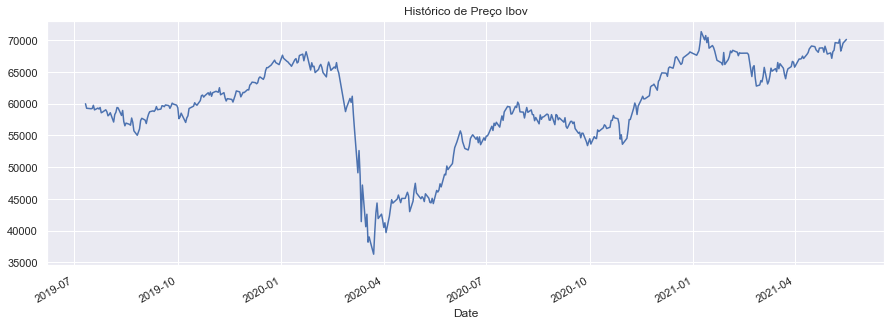

In [39]:
ibov_normalizado.plot(figsize=(15,5) ,label='Ibov')
plt.title('Histórico de Preço Ibov')
plt.show()

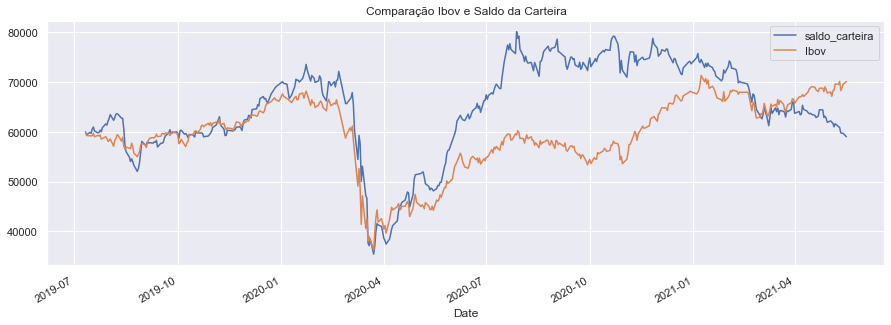

In [40]:
# Vamos observar o comportamento do saldo em carteira e o Ibovespa
dado_normalizado.iloc[:,-1].plot(figsize=(15,5))
ibov_normalizado.plot(label='Ibov')
plt.title('Comparação Ibov e Saldo da Carteira')
plt.legend()
plt.show()

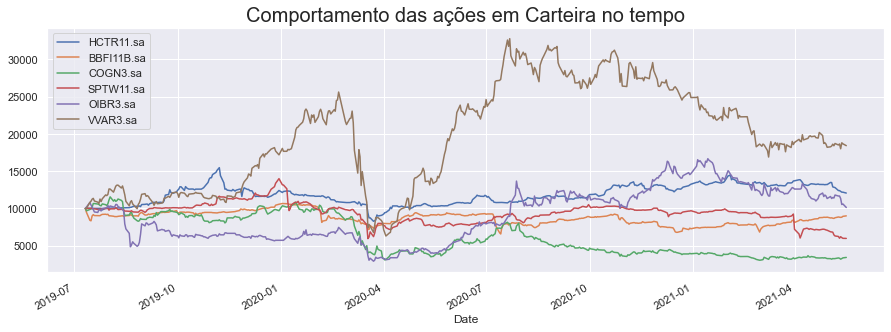

In [41]:
# Vamos verificar o comportamento de cada ação no espaço de tempo estudado, através do gráfico abaixo
dado_normalizado.iloc[:,:-1].plot(figsize=(15,5))
plt.title('Comportamento das ações em Carteira no tempo', size=20)
plt.legend(loc="upper left")
plt.show()

#### Gráfico de comparação do Ibovespa com as linhas de preço de fechamento, média movel de um semana e de um mês


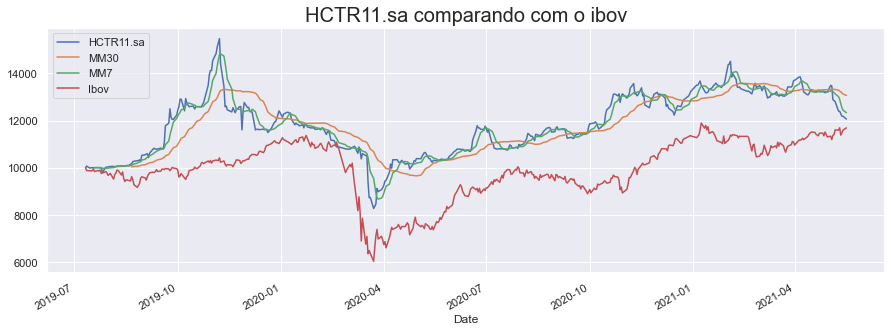

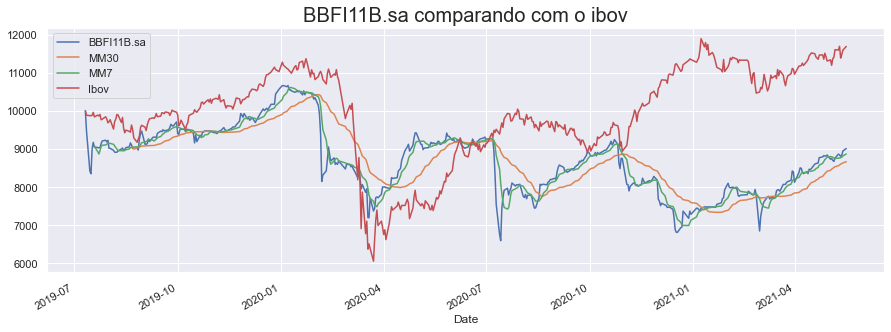

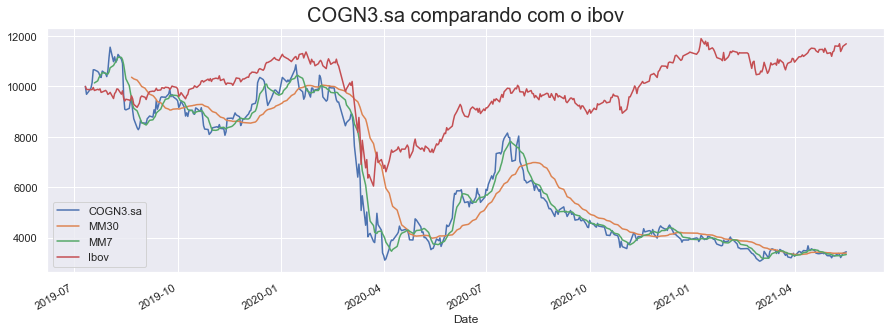

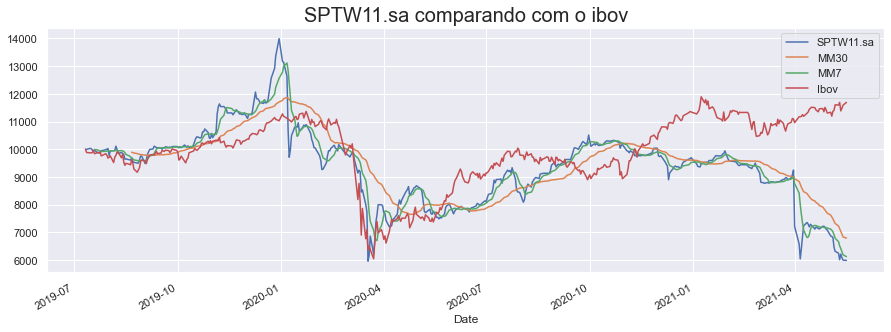

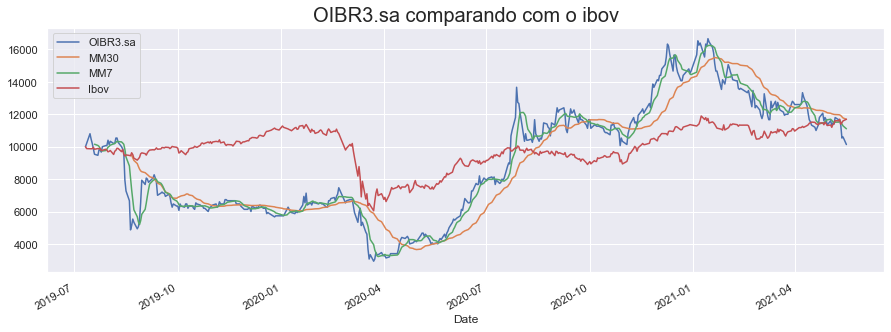

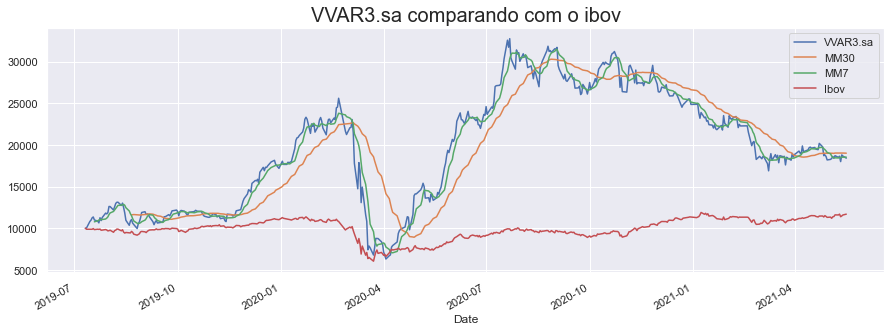

In [42]:
for i in range(0, (len(dado_normalizado.columns)-1)):
    df = dado_normalizado.iloc[:,i]
    df.plot(figsize = (15,5), label=dado_normalizado.columns[i])
    df.rolling(30).mean().plot(label='MM30') # Média movel mensal
    df.rolling(7).mean().plot(label='MM7') # Média móvel semanal
    ibov_a = ibov_normalizado/6
    ibov_a.plot(label='Ibov')
    plt.title(label=dado_normalizado.columns[i]+' comparando com o ibov', size=20)
    plt.legend()
    plt.show()

#### Usando a biblioteca plotly podemos aproximar qualquer área do gráfico que nos interesse e ainda podemos fazer um dowload da imagem no ícone de fotografia ao passarmos o mouse acima de cada gráfico

In [43]:
dado_candle = {}
for codigo in lista:
    dado_info = web.DataReader(codigo,'yahoo')
    dado_candle[codigo] = dado_info

In [44]:
for i in range(0, len(lista)):
    
    nome = lista[i]
    df = dado_candle[nome]
    trace = go.Candlestick(x = df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])
    data = [trace]
    nome = nome
    fig = go.Figure(data=data)
    fig.update_layout(
    title={'text': nome})
    fig.show()

### Calculo do retorno sobre cada investimento 

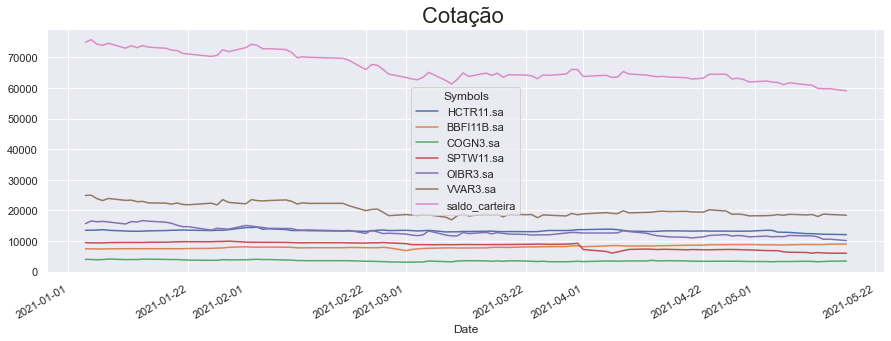

In [45]:
# Vamos visualizar os dados dos últimos 21 dias no gráfico abaixo
carteira = dado_normalizado.iloc[-90:,:]
sns.set()
carteira.plot(figsize = (15,5))
plt.title('Cotação ', size=22)
plt.show()

A função pct_change() calcula a posição x divida pela posição x-1 e o resultado subtrai um. Assim é gerado a mudança percentual entre um dia e o próximo. Esse calculo é demonstrado nas celulas abaixo:

In [46]:
# Primeira posição
carteira['BBFI11B.sa'].iloc[1:].values[0]

7436.0575921825675

In [47]:
# Segunda posição
carteira['BBFI11B.sa'].iloc[:-1][0]

7439.530023730708

In [48]:
# Conforme o calculo é gerado o resultado no out abaixo que corresponde a variação percentual,
# e isso se repete até o fim da coluna

(8453.174324798316 / 8463.696948439145)-1

-0.001243265644426117

In [49]:
((carteira['BBFI11B.sa'].iloc[1:].values / carteira['BBFI11B.sa'].iloc[:-1])-1)

Date
2021-01-04   -0.000467
2021-01-05   -0.005198
2021-01-06   -0.003082
2021-01-07    0.008323
2021-01-08    0.004722
                ...   
2021-05-10   -0.002371
2021-05-11   -0.003968
2021-05-12    0.003187
2021-05-13    0.012708
2021-05-14    0.007059
Name: BBFI11B.sa, Length: 89, dtype: float64

#### A função pct_change() do pacote pandas calcula a variação percentual entre o elemento atual e o anterior. Esta função, por padrão, calcula a variação percentual da linha imediatamente anterior. Vamos criar um dataframe com essa função a partir da carteira que representa os últimos dias de cotação.

In [50]:
# vamos alinhar o Ibov com os dias da carteira 
ibov_para_comparar = pd.DataFrame(ibov_normalizado.reindex_like(carteira))

In [51]:
ibov_para_comparar['Adj Close']

Date
2021-01-04    67653.358188
2021-01-05    68032.830540
2021-01-06    68391.189394
2021-01-07    69592.376315
2021-01-08    71373.328515
                  ...     
2021-05-11    70167.576513
2021-05-12    68310.729842
2021-05-13    68879.082419
2021-05-14    69549.578681
2021-05-17    70148.255164
Name: Adj Close, Length: 90, dtype: float64

In [52]:
carteira['Ibov'] = ibov_para_comparar['Adj Close']
carteira.Ibov

<ipython-input-52-50a420c5c172>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date
2021-01-04    67653.358188
2021-01-05    68032.830540
2021-01-06    68391.189394
2021-01-07    69592.376315
2021-01-08    71373.328515
                  ...     
2021-05-11    70167.576513
2021-05-12    68310.729842
2021-05-13    68879.082419
2021-05-14    69549.578681
2021-05-17    70148.255164
Name: Ibov, Length: 90, dtype: float64

In [53]:
retorno = carteira.pct_change()

In [54]:
# Formatar valores para duas casas decimais e % destacar os valores mãximos em um degrade de verde
# cada ação, saldo e o Ibov
retorno.fillna(0, axis=0)\
       .style\
       .format('{:.2%}')\
       .background_gradient(vmin=0.00001 ,cmap='Greens')
         

<Figure size 1080x360 with 0 Axes>

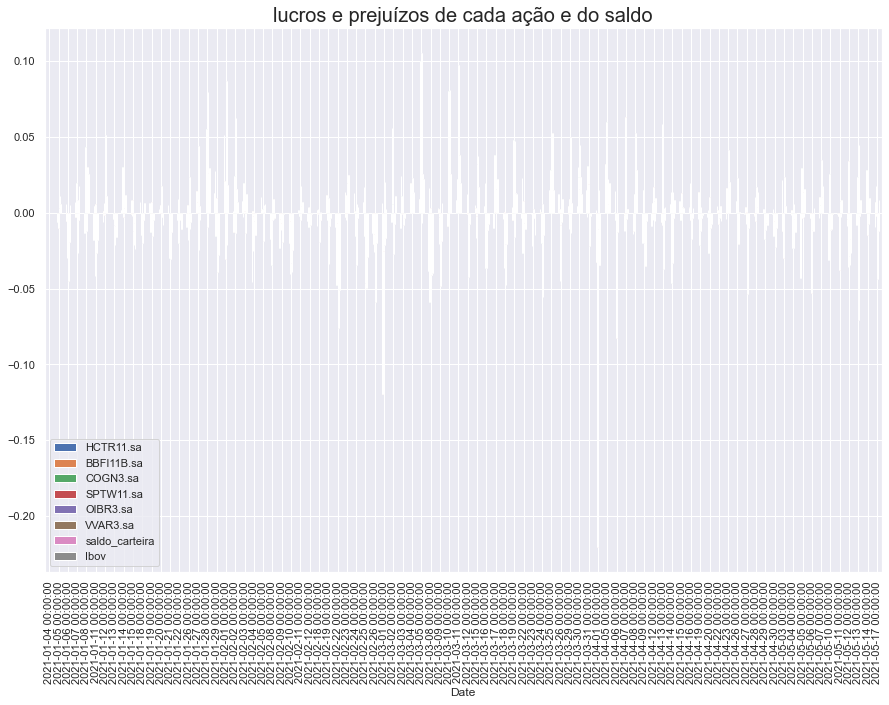

In [55]:
# Vamos visualizar lucros e prejuízos de cada ação e do saldo
plt.figure(figsize=(15,5))
sns.set()
retorno.plot.bar(figsize=(15,10))
plt.title('lucros e prejuízos de cada ação e do saldo', size=20)
plt.legend()
plt.show()

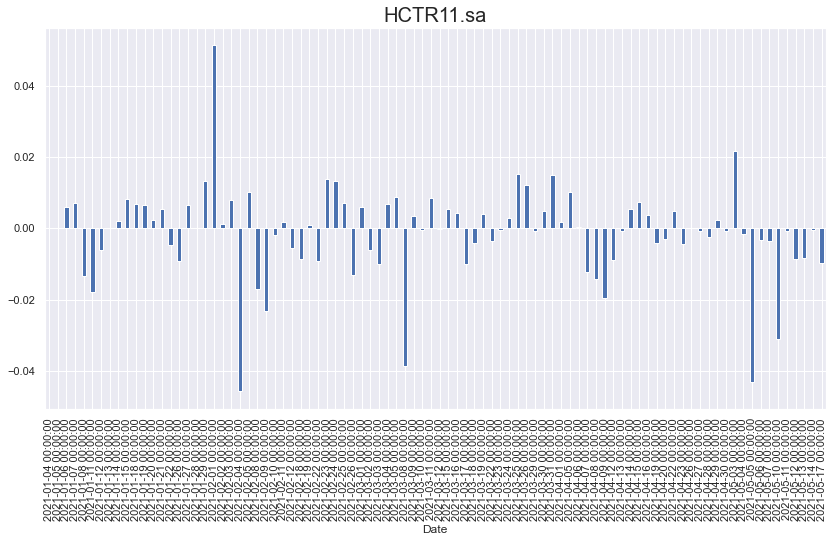

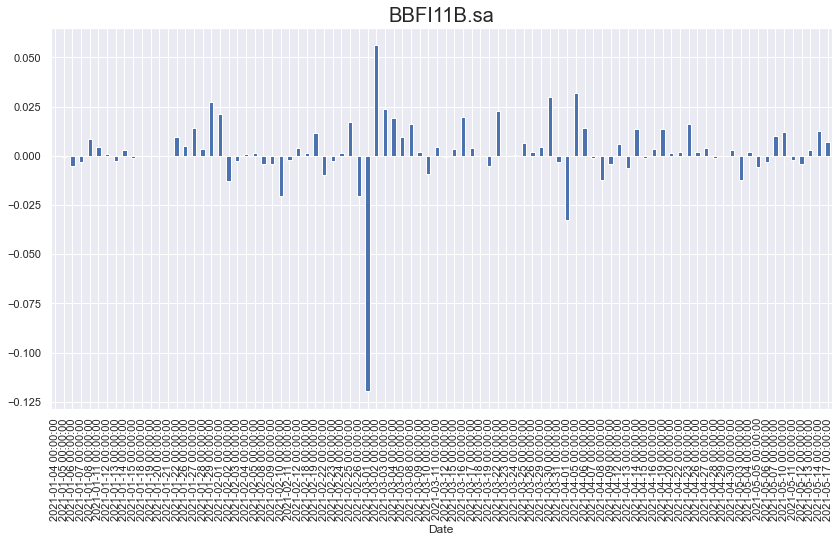

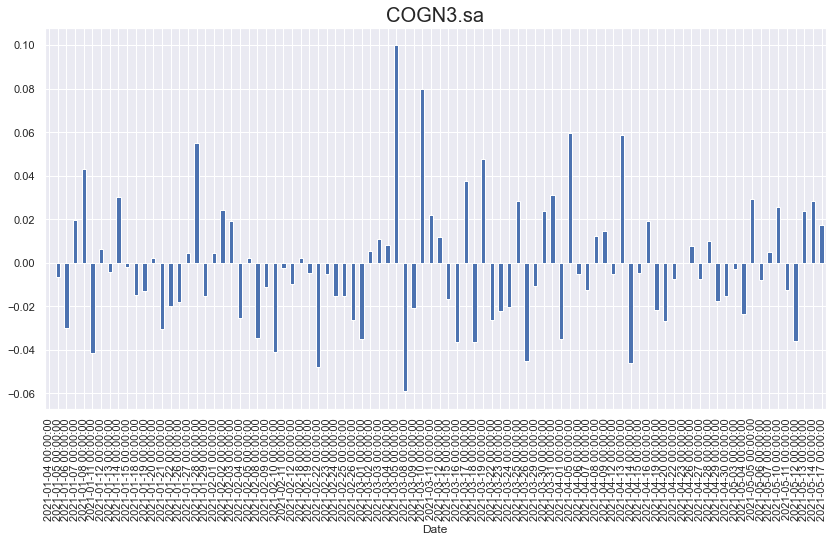

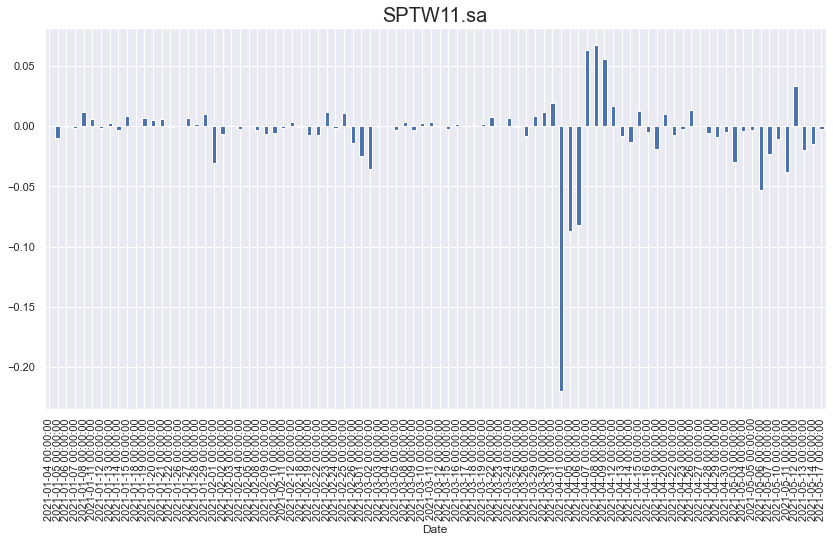

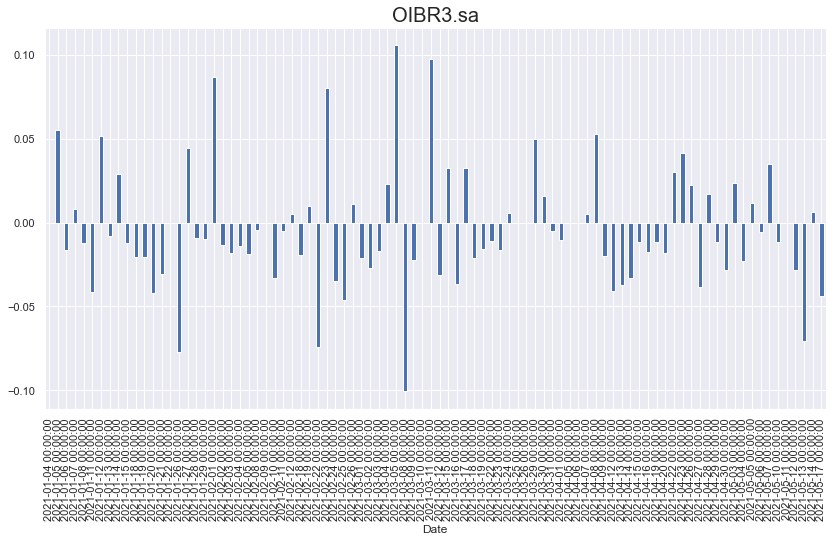

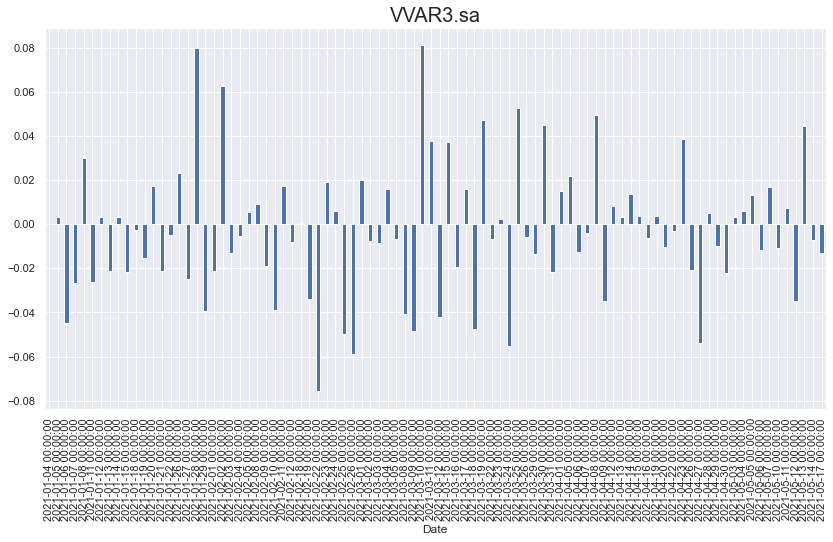

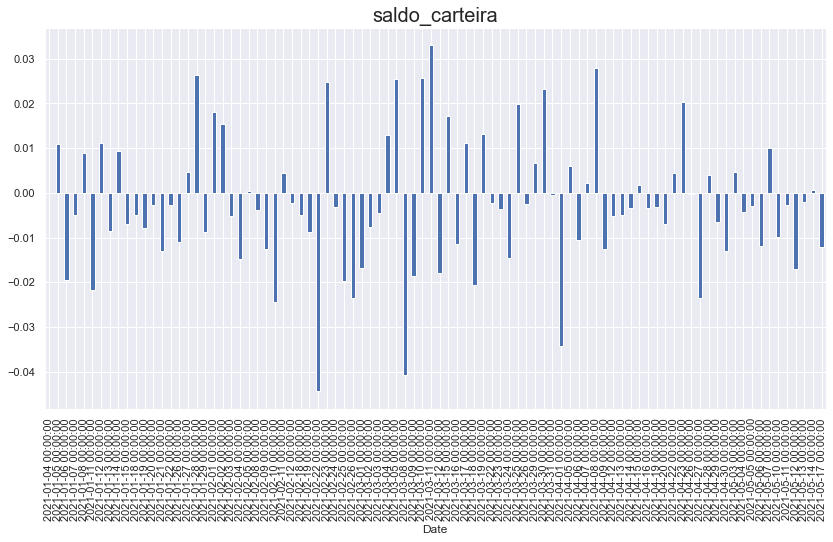

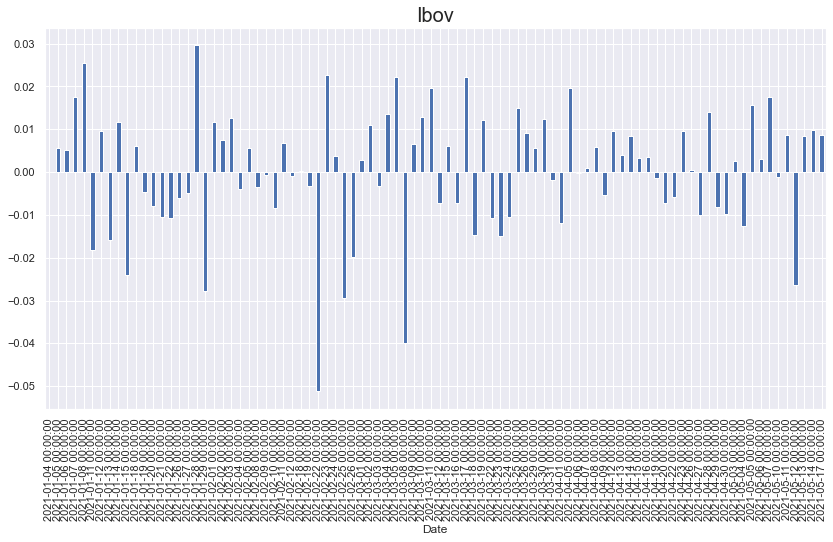

In [56]:
# Lucro e prejuízo de cada ação separado
for codigo in carteira.columns:
    plt.figure(figsize=(15,5))
    retorno.loc[:,codigo].plot.bar(figsize=(14,7))
    plt.title(label=codigo, size=20)
    plt.show()

In [57]:
# Calculo do desvio padrão em uma tabela dinâmina com gráfico de barras, para facilitar a comparação entre os valores
pd.DataFrame(data= retorno.std(),columns=['Desvio_padrão']).style\
                                                           .format('{:.5f}%')\
                                                           .bar(vmin=0.0, color='lightblue')


In [58]:
# calculo da média com cores identificando valores
pd.DataFrame(data= retorno.mean(),columns=['Média']).style\
                                                    .format('{:.5f}')\
                                                    .background_gradient(cmap='PiYG')

In [59]:
# calculo da soma identificando valodes negativos e positivos
pd.DataFrame(data= retorno.sum(),columns=['Soma']).style\
                                                    .format('{:.5f}')\
                                                    .bar(vmin=0.0, color='lightgreen')\
                                                    .applymap(lambda x: f"color: {'red' if x<0 else 'black'}") 

In [60]:
# 
pd.DataFrame(data= (np.prod(retorno+1)-1),columns=['Retorno']).style\
                                                    .format('{:.5f}')\
                                                    .bar(vmin=0.0, color='lightgreen')\
                                                    .applymap(lambda x: f"color: {'red' if x<0 else 'black'}")            